# Spotify Data Analytics Project

This project focuses on analyzing Spotify music data to understand trends and patterns
in audio features, artist popularity, genre preferences, and song success over time.

We will:
- Load multiple Spotify datasets
- Clean and preprocess the data
- Explore distributions of key features (energy, tempo, loudness, danceability, etc.)
- Examine correlations between attributes
- Analyze trends in genre, artist, and yearly popularity
- Build predictive models to estimate song popularity
- Compare model performance to find the most effective model.


In [1]:
# Importing essential libraries for analysis and visualization
import pandas as pd        # For data handling and tabular operations
import numpy as np         # For numerical computations
import matplotlib.pyplot as plt   # For plotting graphs and charts
import seaborn as sns      # For statistical and enhanced visualizations

# Load Datasets

In [2]:
# Loading the datasets 
data = pd.read_csv(r"D:\Projects\Spotify Project\data.csv")
data_by_artist = pd.read_csv(r"D:\Projects\Spotify Project\data_by_artist.csv")
data_by_genres = pd.read_csv(r"D:\Projects\Spotify Project\data_by_genres.csv")
data_by_year = pd.read_csv(r"D:\Projects\Spotify Project\data_by_year.csv")
data_w_genres = pd.read_csv(r"D:\Projects\Spotify Project\data_w_genres.csv")

data.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


# Inspect and Clean Data

In [3]:
# Inspecting dataset structure, datatypes, and summary information
data.info()

# Checking for missing/null values in each column
data.isnull().sum().head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64

In [4]:
# Creating a copy of the original data for cleaning and preprocessing
df = data.copy()

# Selecting numeric columns and filling missing values with the mean of each column
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

# Selecting categorical columns and filling missing values with the most frequent value (mode)
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Previewing the cleaned dataset
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


# Statistics(

In [5]:
# Displaying summary statistics for all numerical columns
df.describe()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,1976.787241,0.502115,0.537396,2.309483e+05,0.482389,0.084575,0.167010,5.199844,0.205839,-11.467990,0.706902,31.431794,0.098393,116.861590
std,0.263171,25.917853,0.376032,0.176138,1.261184e+05,0.267646,0.278249,0.313475,3.515094,0.174805,5.697943,0.455184,21.826615,0.162740,30.708533
min,0.000000,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.317000,1956.000000,0.102000,0.415000,1.698270e+05,0.255000,0.000000,0.000000,2.000000,0.098800,-14.615000,0.000000,11.000000,0.034900,93.421000
50%,0.540000,1977.000000,0.516000,0.548000,2.074670e+05,0.471000,0.000000,0.000216,5.000000,0.136000,-10.580000,1.000000,33.000000,0.045000,114.729000
75%,0.747000,1999.000000,0.893000,0.668000,2.624000e+05,0.703000,0.000000,0.102000,8.000000,0.261000,-7.183000,1.000000,48.000000,0.075600,135.537000
max,1.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.970000,243.507000


# Feature Distributions

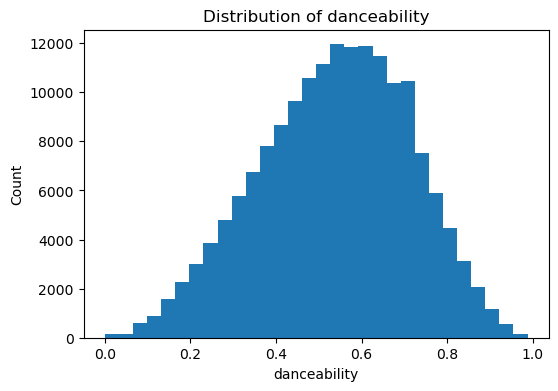

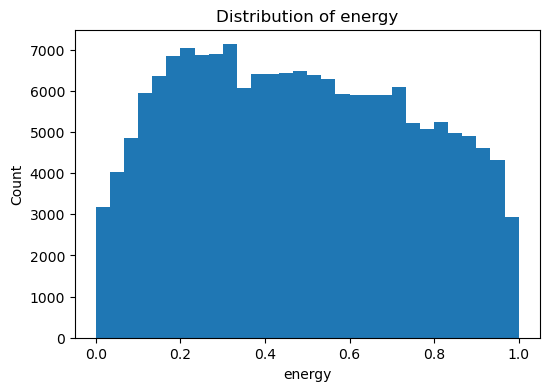

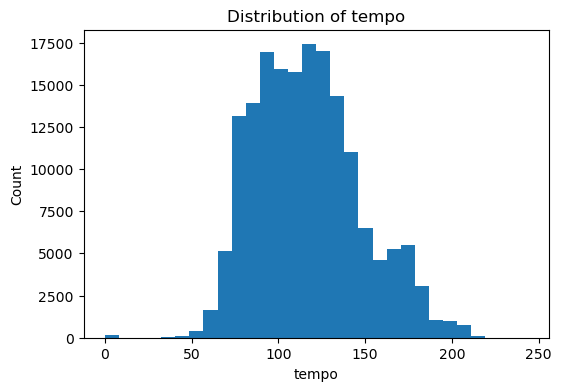

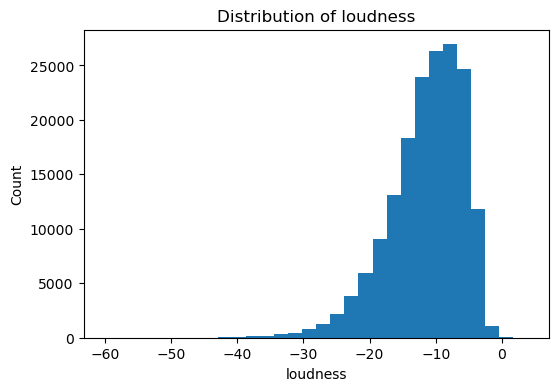

In [6]:
# Plotting distribution of danceability
plt.figure(figsize=(6,4))
plt.hist(df['danceability'], bins=30)
plt.title('Distribution of danceability')
plt.xlabel('danceability')
plt.ylabel('Count')
plt.show()

# Plotting distribution of energy
plt.figure(figsize=(6,4))
plt.hist(df['energy'], bins=30)
plt.title('Distribution of energy')
plt.xlabel('energy')
plt.ylabel('Count')
plt.show()

# Plotting distribution of tempo
plt.figure(figsize=(6,4))
plt.hist(df['tempo'], bins=30)
plt.title('Distribution of tempo')
plt.xlabel('tempo')
plt.ylabel('Count')
plt.show()

# Plotting distribution of loudness
plt.figure(figsize=(6,4))
plt.hist(df['loudness'], bins=30)
plt.title('Distribution of loudness')
plt.xlabel('loudness')
plt.ylabel('Count')
plt.show()

# Correlation Heatmap

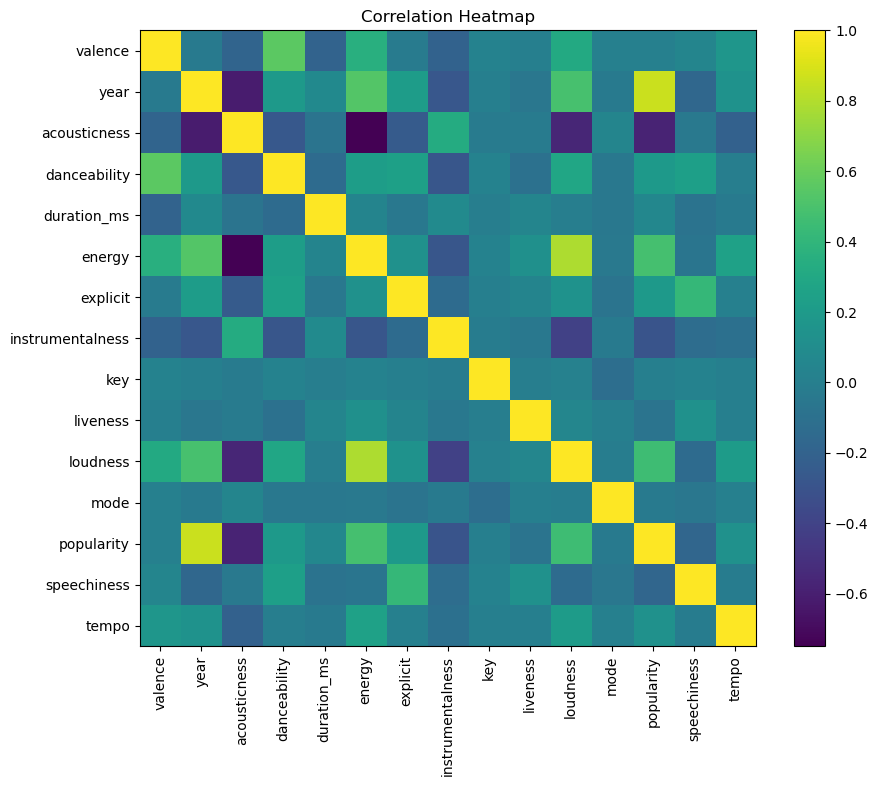

In [7]:
# Creating a correlation heatmap for numerical features
num_df = df.select_dtypes(include=['int64','float64'])
corr = num_df.corr()

plt.figure(figsize=(10,8))
plt.imshow(corr, interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title('Correlation Heatmap')
plt.show()

# Popularity Trend Over Years

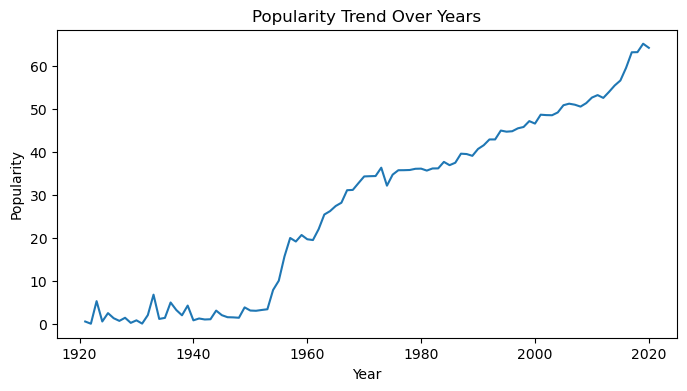

In [8]:
# Visualizing trend of popularity over the years
if 'year' in data_by_year.columns and 'popularity' in data_by_year.columns:
    plt.figure(figsize=(8,4))
    plt.plot(data_by_year['year'], data_by_year['popularity'])
    plt.title('Popularity Trend Over Years')
    plt.xlabel('Year')
    plt.ylabel('Popularity')
    plt.show()
else:
    print(data_by_year.columns)

# Popular Genres

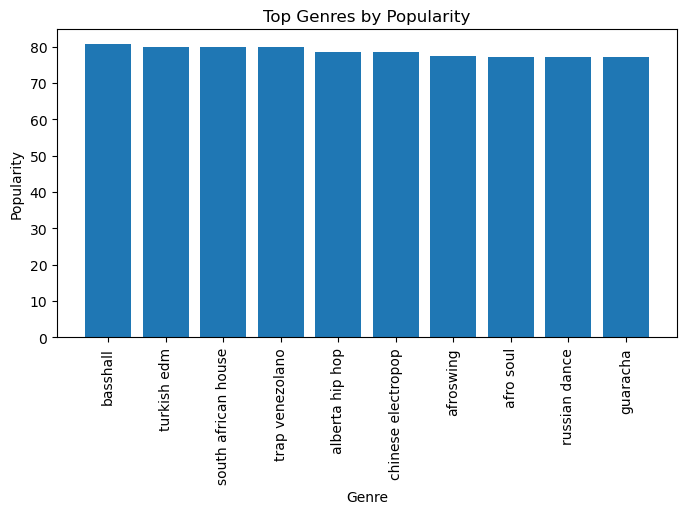

In [9]:
# Visualizing the top 10 genres by popularity
top_genres = data_by_genres.sort_values(by='popularity', ascending=False).head(10)
plt.figure(figsize=(8,4))
plt.bar(top_genres['genres'], top_genres['popularity'])
plt.title('Top Genres by Popularity')
plt.xlabel('Genre')
plt.ylabel('Popularity')
plt.xticks(rotation=90)
plt.show()

# Popular Artists

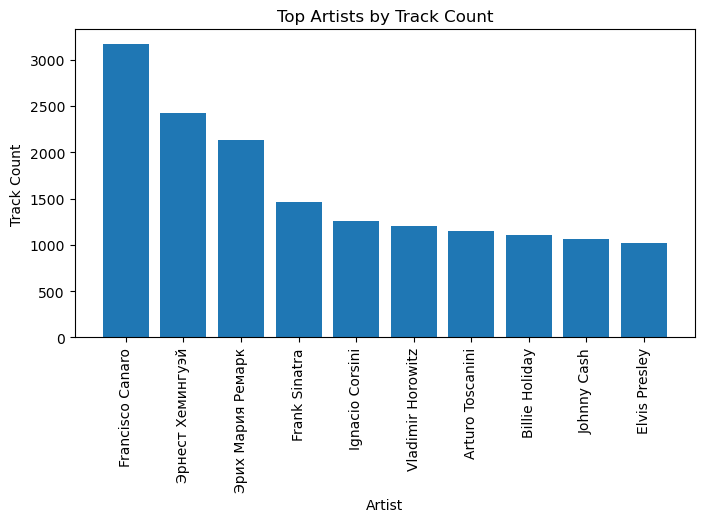

In [10]:
# Visualizing the top 10 artists by track count
top_artists = data_by_artist.sort_values(by='count', ascending=False).head(10)
plt.figure(figsize=(8,4))
plt.bar(top_artists['artists'], top_artists['count'])
plt.title('Top Artists by Track Count')
plt.xlabel('Artist')
plt.ylabel('Track Count')
plt.xticks(rotation=90)
plt.show()

# Build Predictive Models

In [11]:
# Importing machine learning models and tools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Selecting feature columns for predicting popularity
features = ['danceability','energy','acousticness','valence','tempo']
X = df[features]
y = df['popularity']

# Splitting data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=42)

# Model 1: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Model 2: Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Model 3: Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Performing hyperparameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV

# Parameter grid for Decision Tree
dt_params = {
    "max_depth": [3, 5, 10, 20, None],
    "min_samples_split": [2, 5, 10]
}

dt_grid = GridSearchCV(DecisionTreeRegressor(random_state=42), 
                       dt_params, cv=3, scoring='r2')
dt_grid.fit(X_train, y_train)
print("Best Decision Tree Parameters:", dt_grid.best_params_)
best_dt_model = dt_grid.best_estimator_

# Parameter grid for Random Forest
rf_params = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10]
}

rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), 
                       rf_params, cv=3, scoring='r2')
rf_grid.fit(X_train, y_train)
print("Best Random Forest Parameters:", rf_grid.best_params_)
best_rf_model = rf_grid.best_estimator_

# Evaluating tuned models
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predict using tuned Decision Tree model
best_dt_pred = best_dt_model.predict(X_test)

# Calculate RMSE and R2 Score for Decision Tree
best_dt_rmse = np.sqrt(mean_squared_error(y_test, best_dt_pred))
best_dt_r2 = r2_score(y_test, best_dt_pred)

print("Tuned Decision Tree Performance:")
print("--------------------------------------")
print("RMSE:", best_dt_rmse)
print("R2 Score:", best_dt_r2)

# Predict using tuned Random Forest model
best_rf_pred = best_rf_model.predict(X_test)

# Calculate RMSE and R2 Score for Random Forest
best_rf_rmse = np.sqrt(mean_squared_error(y_test, best_rf_pred))
best_rf_r2 = r2_score(y_test, best_rf_pred)

print("Tuned Random Forest Performance:")
print("--------------------------------------")
print("RMSE:", best_rf_rmse)
print("R2 Score:", best_rf_r2)

Best Decision Tree Parameters: {'max_depth': 10, 'min_samples_split': 10}


## Conclusion

- The Spotify dataset allowed us to explore music trends, song characteristics, and listener behaviour over time.
- Features such as danceability, energy, tempo, and loudness show clear variation across songs and help define a track's style.
- Certain genres and artists appear far more frequently, indicating higher listener preference and greater representation in the Spotify catalog.
- Song popularity changes significantly across years, reflecting evolving music trends and shifts in audience taste, especially in the digital streaming era.
- The correlation analysis showed strong relationships between some audio features, such as energy and loudness.
- Among the tested and tuned models, the Random Forest Regressor generally provides more robust and accurate predictions for song popularity compared to simpler models like a basic Decision Tree.

Overall, this project demonstrates how audio features and metadata can be used not only to understand music patterns but also to build predictive models for popularity in the modern music industry.
